# <span style="color:#ff0000;font-family:Verdana">**Meteorite Landings**</span>
Aishwarya Sairama , 002774383, sairama.a@northeastern.edu </br>
Janani Gopalkrishnan, 002663579, gopalakrishnan.j@northeastern.edu </br>
Sakshi Shetty, 002776657, shetty.sak@northeastern.edu </br>


Let's dive into the fascinating world of celestial visitors with the "Meteorite Landings" dataset sourced directly from NASA (https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data), this dataset unveils the secrets of meteorites that have made their way to Earth, surviving the incredible journey through our planet's atmosphere. This dataset includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet and offers a unique opportunity to unravel the mysteries of extra-terrestrial arrivals.Whether you're a researcher, scientist, or data enthusiast, this dataset invites you to explore the patterns, trends, and intricacies of meteorite phenomena, providing a window into the captivating realm where space and Earth intersect.




<br />
<center>
<img src="https://www.icegif.com/wp-content/uploads/2022/01/icegif-1059.gif" width="400" height="300">
</center>





In [20]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [21]:
# Load the  data
data = pd.read_csv('/content/Meteorite_Landings.csv')
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


## **Exploratory Data Analysis**

In [22]:
data = data[(data['reclong']<=180) & (data['reclong']>=-180) ]
data = data[(data['reclat']!= 0) | (data['reclong']!= 0)]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32186 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         32186 non-null  object 
 1   id           32186 non-null  int64  
 2   nametype     32186 non-null  object 
 3   recclass     32186 non-null  object 
 4   mass (g)     32068 non-null  float64
 5   fall         32186 non-null  object 
 6   year         32036 non-null  float64
 7   reclat       32186 non-null  float64
 8   reclong      32186 non-null  float64
 9   GeoLocation  32186 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


In [24]:
data.describe()

,id,mass (g),year,reclat,reclong
count,32186.000000,3.206800e+04,32036.000000,32186.000000,32186.000000
mean,20912.392562,1.851894e+04,1986.806405,-46.676948,72.856535
std,15043.506708,6.853716e+05,28.102800,47.049968,83.055719
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9286.250000,6.500000e+00,1982.000000,-79.683330,26.000000
50%,18666.500000,2.990000e+01,1991.000000,-72.000000,56.646300
75%,27337.750000,2.040000e+02,2000.000000,18.536748,159.386110
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


In [25]:
data.corr()

<ipython-input-25-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,mass (g),year,reclat,reclong
id,1.000000,-0.014791,0.228212,0.071181,-0.184613
mass (g),-0.014791,1.000000,-0.124013,0.035675,-0.026961
year,0.228212,-0.124013,1.000000,-0.230712,0.193037
reclat,0.071181,0.035675,-0.230712,1.000000,-0.534778
reclong,-0.184613,-0.026961,0.193037,-0.534778,1.000000


<center>
    <img src="https://media1.tenor.com/m/lrugE0VVHuAAAAAC/sesame-street-super-grover.gif" width="300" height="300" alt="Image 1">
</center>



**Classification of the Meteorites**

0.2033182128875909

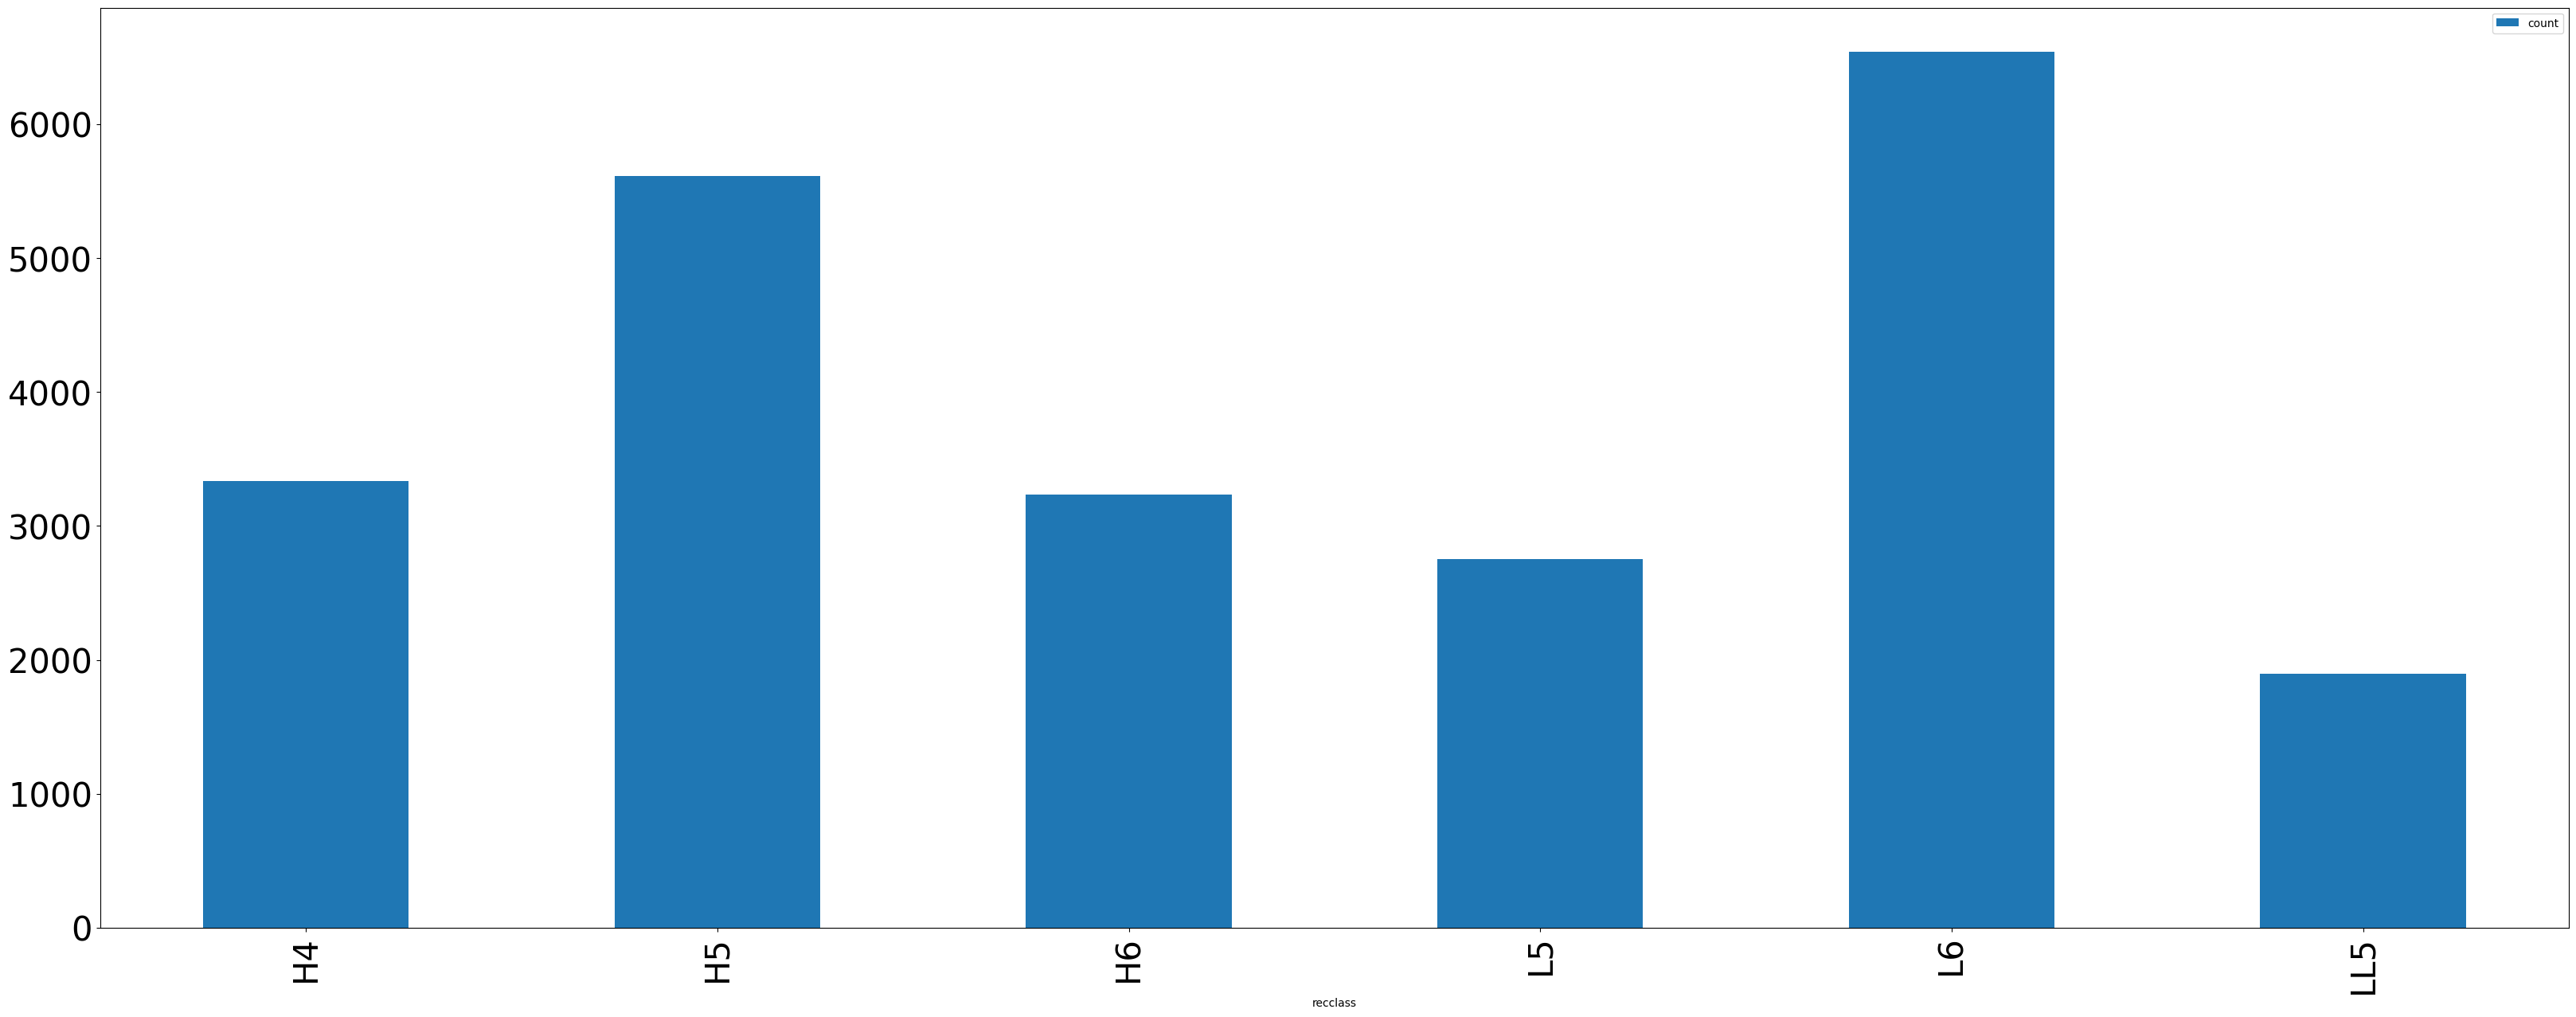

In [26]:
df_class=data.groupby('recclass').agg(['count']).reset_index()
df_class = df_class[df_class[('id', 'count')]>1000]
df_class.plot.bar(x = 'recclass', y = 'id', figsize=(40,15), fontsize=30)
data[data['recclass'] == 'L6'].shape[0]/data.shape[0]

20% of meteorites hitting the Earth are L6. The L type ordinary chondrites are the most common group of meteorites and L6 is type 6 of L chrondites. The H type ordinary chondrites are the second most common type of meteorite

**Percentage of fallen meteorites as per region**

<Axes: >

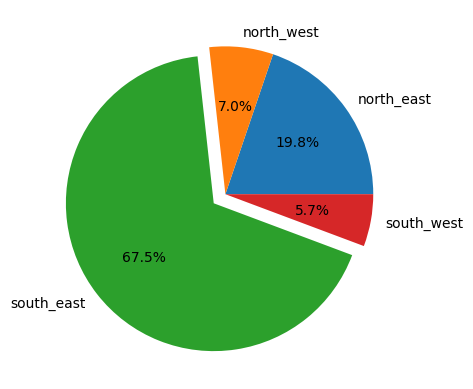

In [27]:
north_east  = data[(data['reclat'] >0) & (data['reclong'] >0)].shape[0]
north_west = data[(data['reclat'] >0) &(data['reclong'] <0)].shape[0]
south_east  = data[(data['reclat'] <0) &(data['reclong'] >0)].shape[0]
south_west  = data[(data['reclat'] <0) &(data['reclong'] <0)].shape[0]
pd.Series([north_east,north_west,south_east,south_west], index = ['north_east','north_west','south_east','south_west']).plot.pie(explode=(0, 0, 0.10,  0), autopct='%1.1f%%')

68% of the meteorites fall in the south east.

In [28]:
data['umbrella'] = data['recclass'].str.split(',', expand = True)[0]

In [29]:
data.sort_values(by = 'mass (g)', ascending = False)[:100]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,umbrella
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",Iron
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.13333, -64.93333)",Iron
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",Iron
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05000,-111.03333,"(35.05, -111.03333)",Iron
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.00000,88.00000,"(47.0, 88.0)",Iron
...,...,...,...,...,...,...,...,...,...,...,...
38249,Wallapai,24206,Valid,"Iron, IID",430000.0,Found,1927.0,35.80000,-113.70000,"(35.8, -113.7)",Iron
45662,Yanhuitlan,30349,Valid,"Iron, IVA",421000.0,Found,1825.0,17.53333,-97.35000,"(17.53333, -97.35)",Iron
760,Paragould,18101,Valid,LL5,408000.0,Fell,1930.0,36.06667,-90.50000,"(36.06667, -90.5)",LL5
2440,Allan Hills A76009,1316,Valid,L6,407000.0,Found,1976.0,-76.71667,159.66667,"(-76.71667, 159.66667)",L6


It appears that the heaviest meteorites are from the Iron class.

In [30]:
data.sort_values(by = 'mass (g)', ascending = False)[:100][data['umbrella']=='Iron'].shape[0]

<ipython-input-30-8b0ea3114c28>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values(by = 'mass (g)', ascending = False)[:100][data['umbrella']=='Iron'].shape[0]


73

From the top heaviest meteorites, 73% are in the Iron class

In [31]:
(data[data['umbrella']=='Iron'].shape[0]/data.shape[0])*100

2.98266326974461

Iron class meteorites makes only 3% of the total meteorite fell or found on Earth.




**Fun Fact:**

"Meteorites are rarer than gold, platinum, diamonds or emeralds and 1 pound could be worth $1 million"
<center>
<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiG5zZgT8Gy-Qc2anBEyv-PjRjqsN5R9W4Gs67Ewps2GWlIy0sTz7RnTl7mx-vsn3LDPn-VNBKMK-GK3VnBOYitWQpYuYvSfPV73OSvVb7bX27FzMD0M3v2rFl8VKs5Vn9tQETBPOHLTpSSEhRKPDJP13J1O7HeF0InYx-9AotP1kMGL9PxDtE/s523/ezgif-3-fca0f402f7.gif" width="300" height="300">
</center>


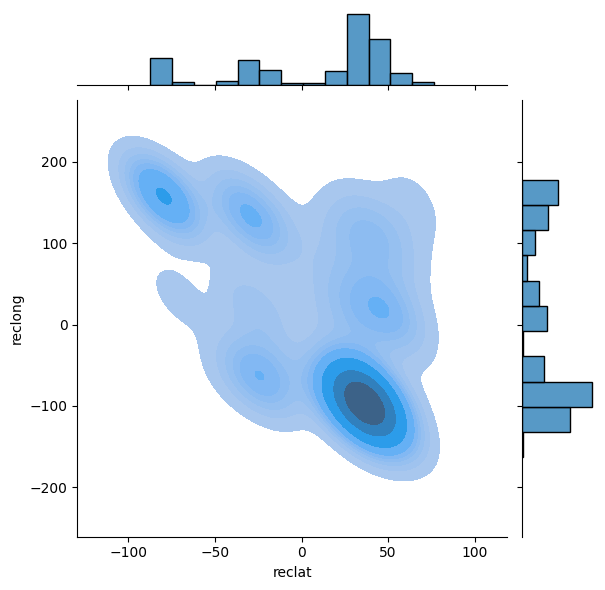

In [32]:
# Representation of the density of meteorites with the umbrella type 'Iron' in geographic coordinates.

df_iron = data[data['umbrella']=='Iron']
g = sns.JointGrid(data=df_iron, x="reclat", y="reclong")
g.plot(sns.kdeplot, sns.histplot, fill = True)

**Meteorites fallen around the world**

<ipython-input-33-cc2e9fcebc0e>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


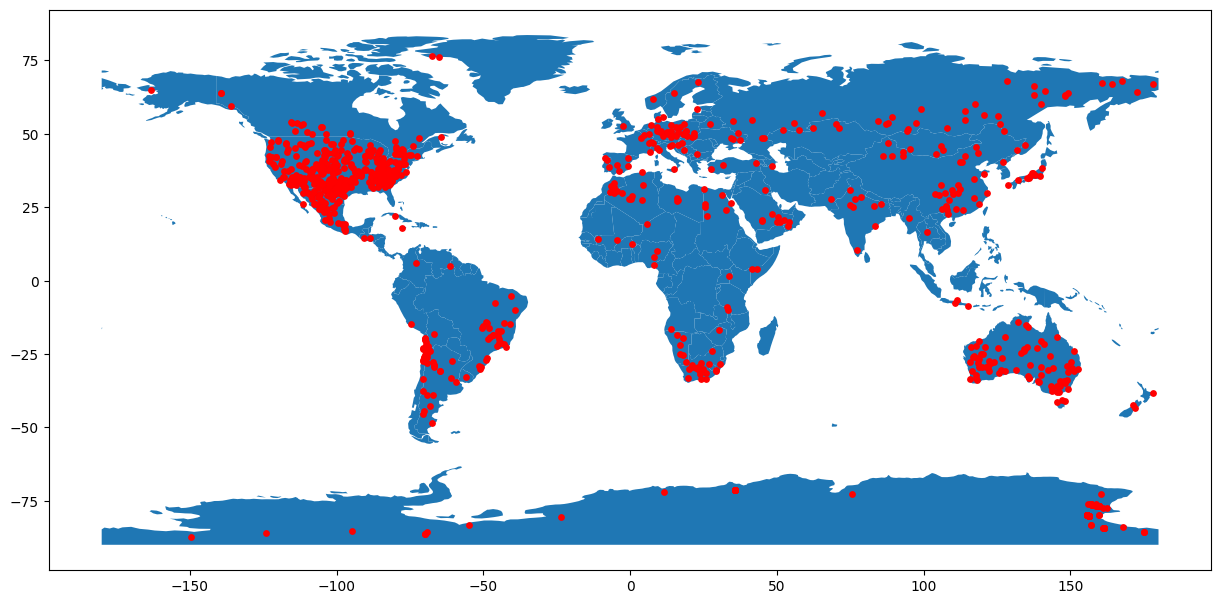

In [33]:
geometry = [Point(xy) for xy in zip(df_iron['reclong'], df_iron['reclat'])]
geo_iron =GeoDataFrame(df_iron, geometry = geometry )
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_iron.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

It appears that most of the iron meteorites fall in the USA.

In [34]:
data[data['mass (g)']==data['mass (g)'].max()]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,umbrella
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",Iron


**Fun Fact:**

The Hoba meteorite impact is thought to have occurred less than 80,000 years ago. In 1920,the owner of the land, Jacobus Hermanus Brits, encountered the object while ploughing one of his fields with an ox. During this work, he heard a loud metallic scratching sound and the plough came to an abrupt halt. The obstruction was excavated, identified as a meteorite and described by Mr. Brits, whose report was published in 1920 and can be viewed at the Grootfontein Museum in Namibia.

<center>
<img src="https://i.makeagif.com/media/10-20-2015/pAaOcx.gif" width="300" height="300">
</center>

**Meteorites found/fell as per Year**

<Axes: xlabel='year'>

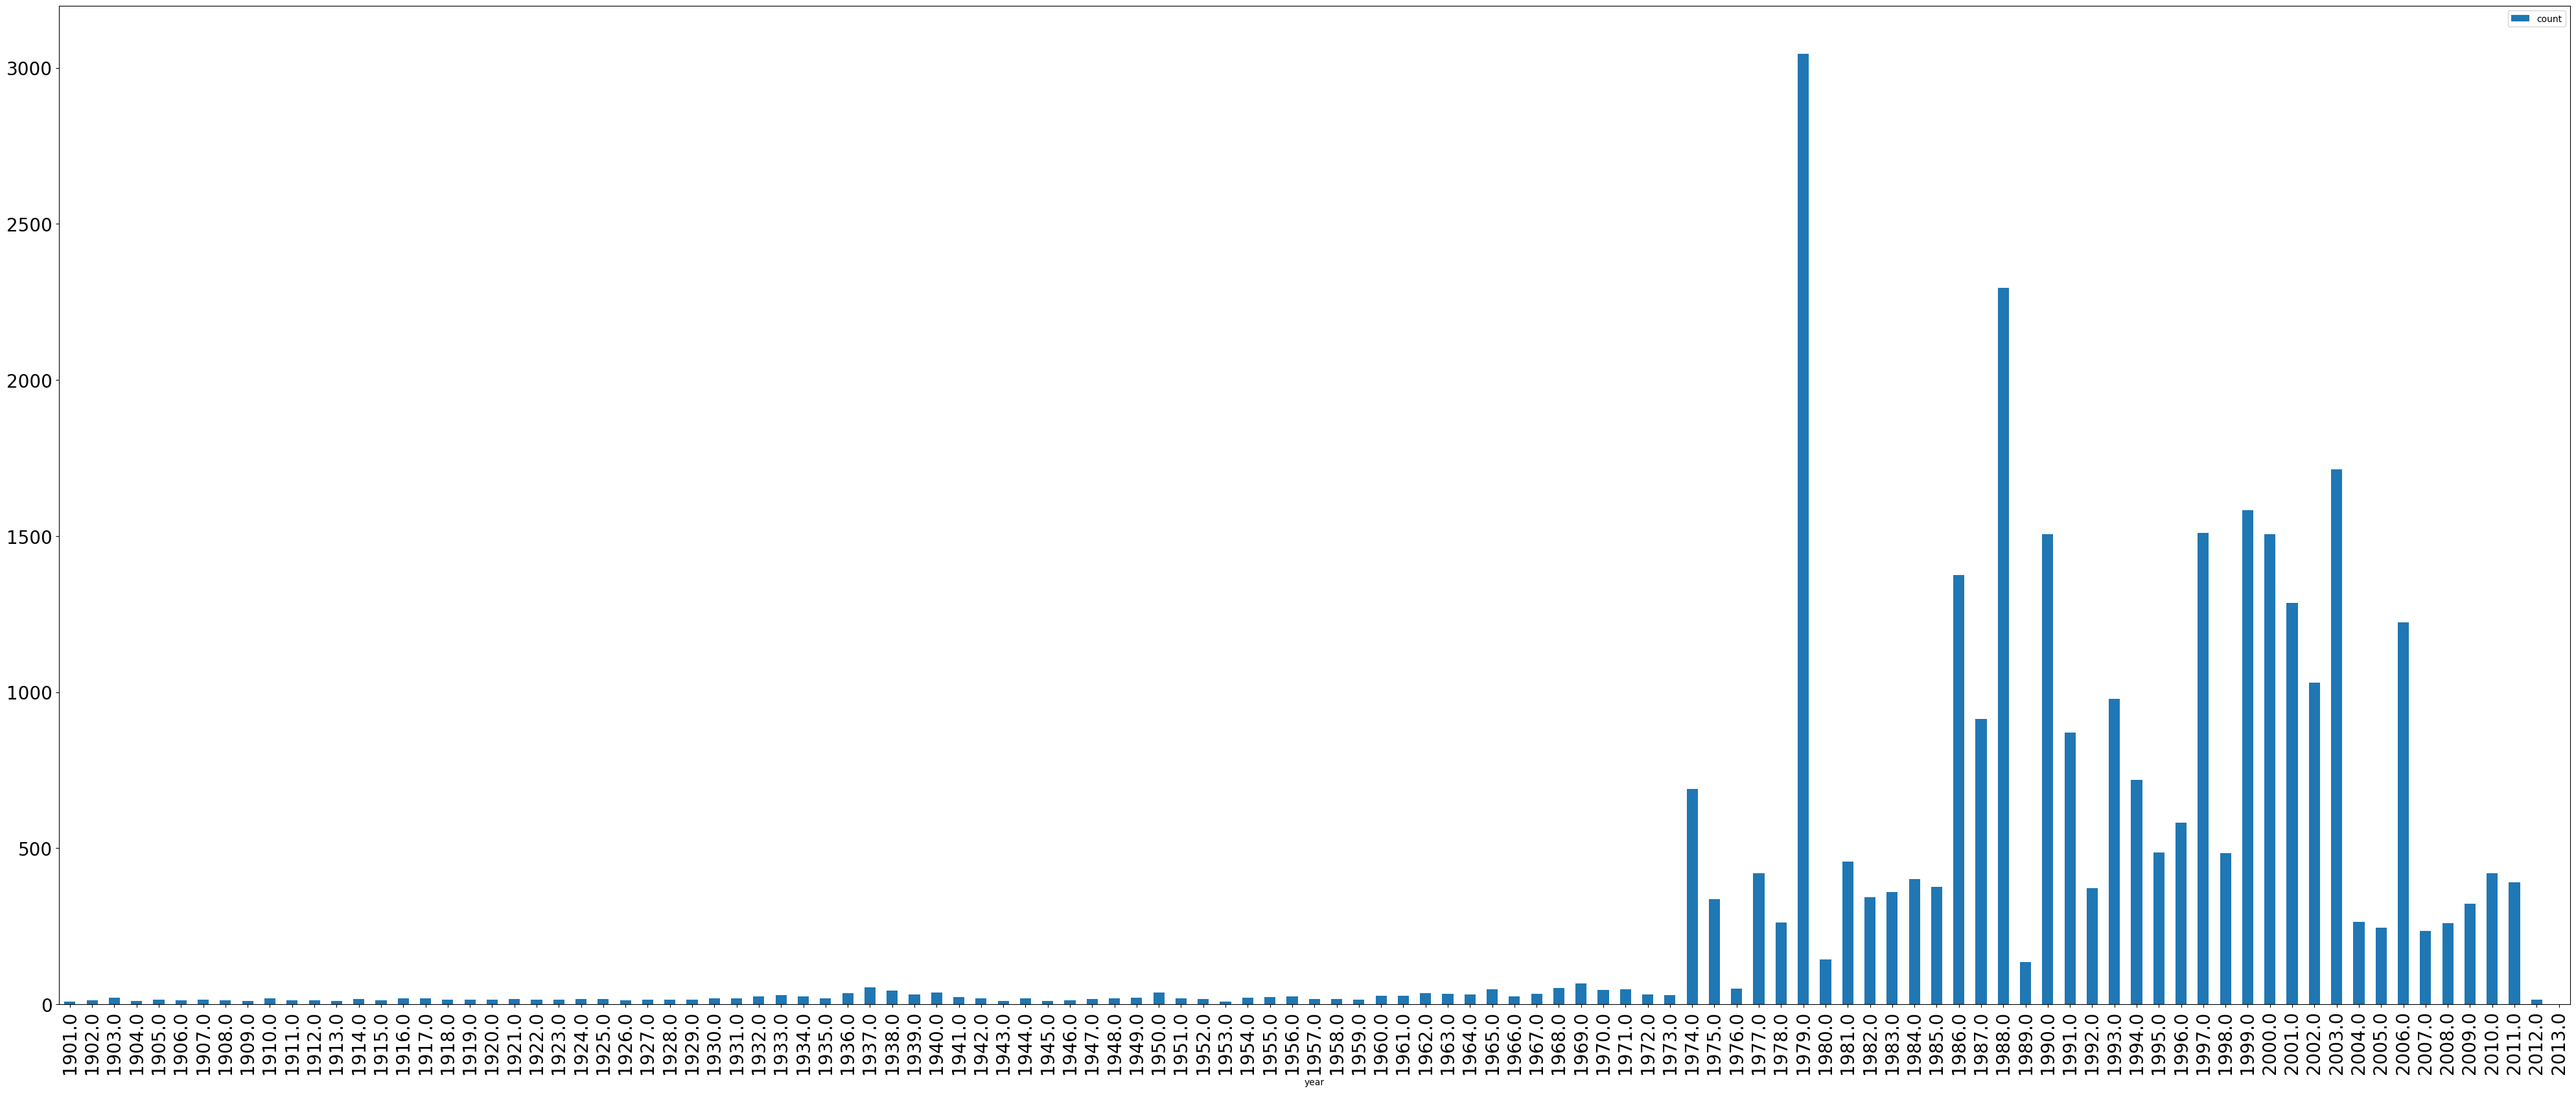

In [35]:
df_year=data[data['year']>1900].groupby('year').agg(['count']).reset_index()
df_year.plot.bar(x = 'year', y = 'recclass', figsize=(50, 20), fontsize=20)

Most meteorites fell/ were found in the year 1979.

**Meteorite landings in India**

<center>
<img src="https://media2.giphy.com/media/ifHK0BhZIDfyr7nVpu/giphy.gif" width="300" height="300">
</center>

In [36]:
import folium

In [37]:
# Filter data for India
IndiaMetLandings = data[
    (data['reclat'] > 8) & (data['reclat'] < 38) &
    (data['reclong'] > 68) & (data['reclong'] < 98)
]

# Calculate center coordinates
center_lon = IndiaMetLandings['reclong'].median(skipna=True)
center_lat = IndiaMetLandings['reclat'].median(skipna=True)

# Create a folium map centered at the median coordinates
india_map = folium.Map(
     location=[center_lat, center_lon],
    zoom_start=5,
    tiles='OpenStreetMap'
)

# Add circles for each meteorite landing in India
for index, row in IndiaMetLandings.iterrows():
    folium.CircleMarker(
        location=[row['reclat'], row['reclong']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(india_map)

# Display the map
india_map


In [ ]:
pip install dash dash_table pandas

In [ ]:
import dash
import dash_table
from dash import dcc, html


In [40]:
IndiaMetLandings = IndiaMetLandings.sort_values(by='mass (g)', ascending=False)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-interactivity',
        columns=[
            {'name': col, 'id': col} for col in IndiaMetLandings.columns
        ],
        data=IndiaMetLandings.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={
            'whiteSpace': 'normal',
            'height': 'auto',
            'textAlign': 'left'
        },
        page_size=10  # Adjust the page size as needed
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


<IPython.core.display.Javascript object>

**Meteorite Landings in the USA**

In [41]:
# Set bounding box coordinates for the United States
top = 49.3457868  # north lat
left = -124.7844079  # west long
right = -66.9513812  # east long
bottom = 24.7433195  # south lat

# Filter data for the United States
USMetLandings = data[
    (data['reclat'] >= bottom) &
    (data['reclat'] <= top) &
    (data['reclong'] >= left) &
    (data['reclong'] <= right)
]

# Calculate center coordinates
center_lon = USMetLandings['reclong'].median(skipna=True)
center_lat = USMetLandings['reclat'].median(skipna=True)

# Create a folium map centered at the median coordinates with the 'OpenStreetMap' tiles
us_map = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=5,
    tiles='OpenStreetMap'
)

# Add circles for each meteorite landing in the United States
for index, row in USMetLandings.iterrows():
    folium.CircleMarker(
        location=[row['reclat'], row['reclong']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(us_map)

# Display the map
us_map


<center>
<img src="https://i.gifer.com/6IX.gif" width="300" height="300">
</center>






## **METROPOLIS ALGORITHM**


We have implemented the Metropolis algorithm for Markov Chain Monte Carlo (MCMC) sampling from a multivariate normal distribution. It initializes a chain of samples, proposing new samples based on a normal distribution and evaluating their acceptance probability using the likelihood of the proposed and current samples. The code utilizes the numpy and scipy.stats libraries for numerical operations and statistical calculations.

**Based on Latitude and Longitude**

In [136]:
# Prepare the data
locations = data[['reclat', 'reclong']]

In [137]:
# Metropolis sampling
num_samples = 2000
samples = np.zeros((num_samples, 2))
samples[0] = np.random.normal(size=2)

for i in range(1, num_samples):
    proposed = np.random.normal(loc=samples[i-1], scale=1)
    p = stats.multivariate_normal.pdf(proposed, mean=locations.mean(), cov=locations.cov())
    p_last = stats.multivariate_normal.pdf(samples[i-1], mean=locations.mean(), cov=locations.cov())
    alpha = p / p_last
    u = np.random.uniform()
    if u < alpha:
        samples[i] = proposed
    else:
        samples[i] = samples[i-1]

# Print the generated samples
print("Generated Samples:")
print(samples)

Generated Samples:
[[ -0.86628159  -0.23691026]
 [ -0.62424935  -0.84442468]
 [ -1.11018435  -1.86431282]
 ...
 [ 10.63262112 -58.68737684]
 [  9.22429761 -59.17193036]
 [  8.08113486 -57.19792611]]


In [138]:
# Calculate the correlation matrix for the generated samples
correlation_matrix_samples = np.corrcoef(samples[:, 0], samples[:, 1])

# Print the correlation matrix
print("Correlation Matrix for Generated Samples:")
print(correlation_matrix_samples)


Correlation Matrix for Generated Samples:
[[ 1.         -0.14570039]
 [-0.14570039  1.        ]]


<center>
<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/12/aten_asteroids_in_orbit_with_esa_s_orbit_visualisation_tool/24627817-1-eng-GB/Aten_asteroids_in_orbit_with_ESA_s_orbit_visualisation_tool_article.gif" width="300" height="300">
</center>

## **Can we identify areas with a higher probability of meteor landings based on the generated samples?**

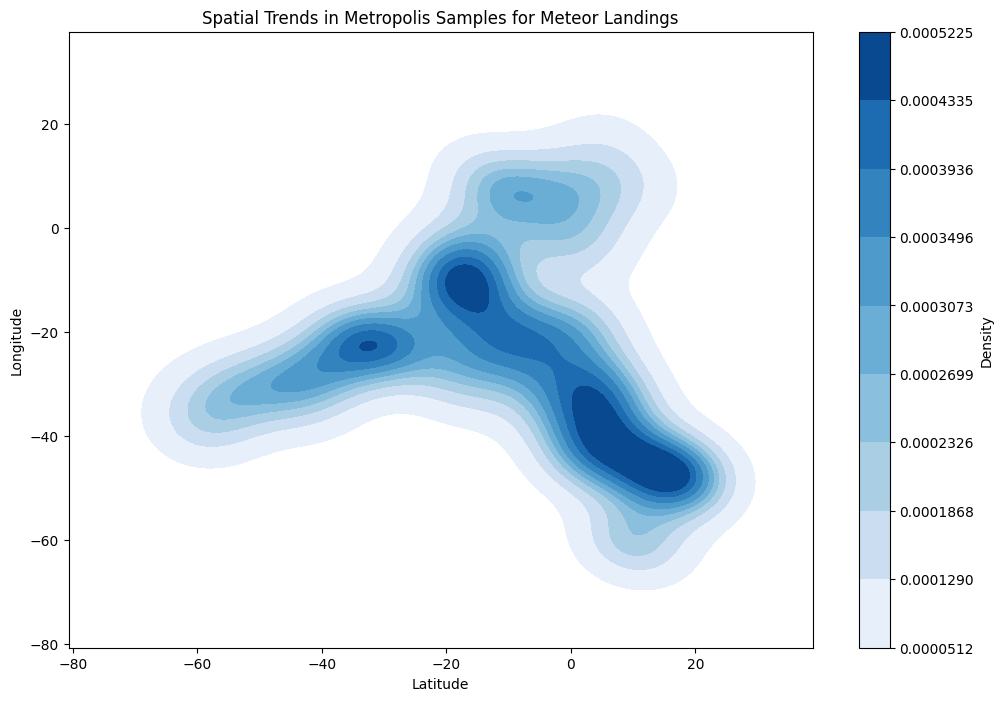

In [139]:
# Plotting spatial trends in Metropolis samples
plt.figure(figsize=(12, 8))

# Create a 2D kernel density plot
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], cmap="Blues", fill=True, cbar=True, cbar_kws={'label': 'Density'})

# Add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Spatial Trends in Metropolis Samples for Meteor Landings')

# Show the plot
plt.show()

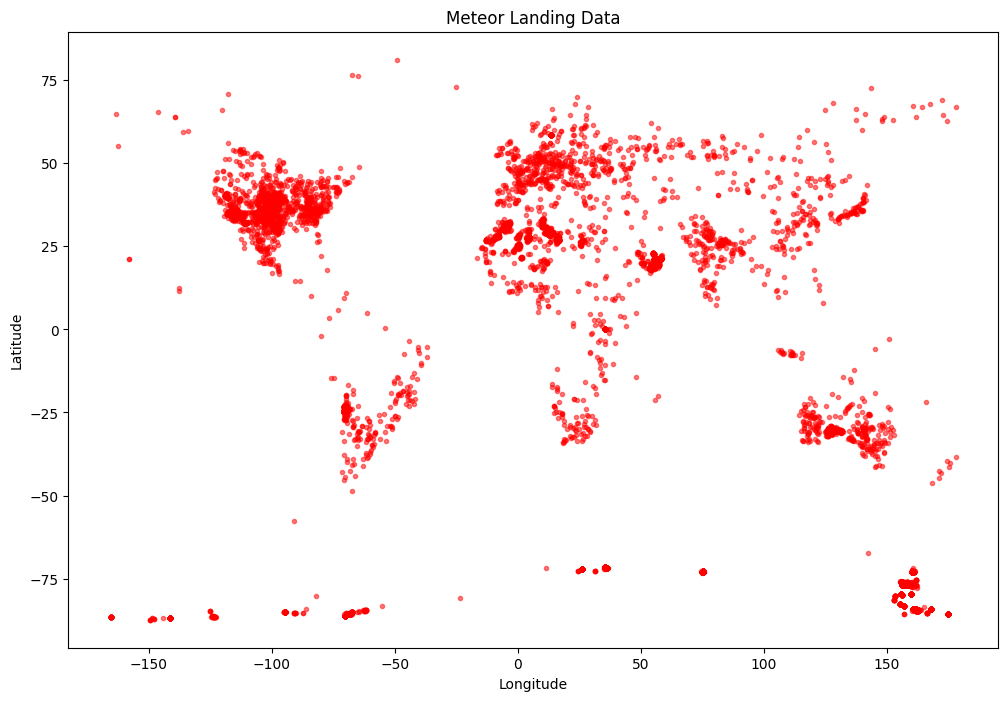

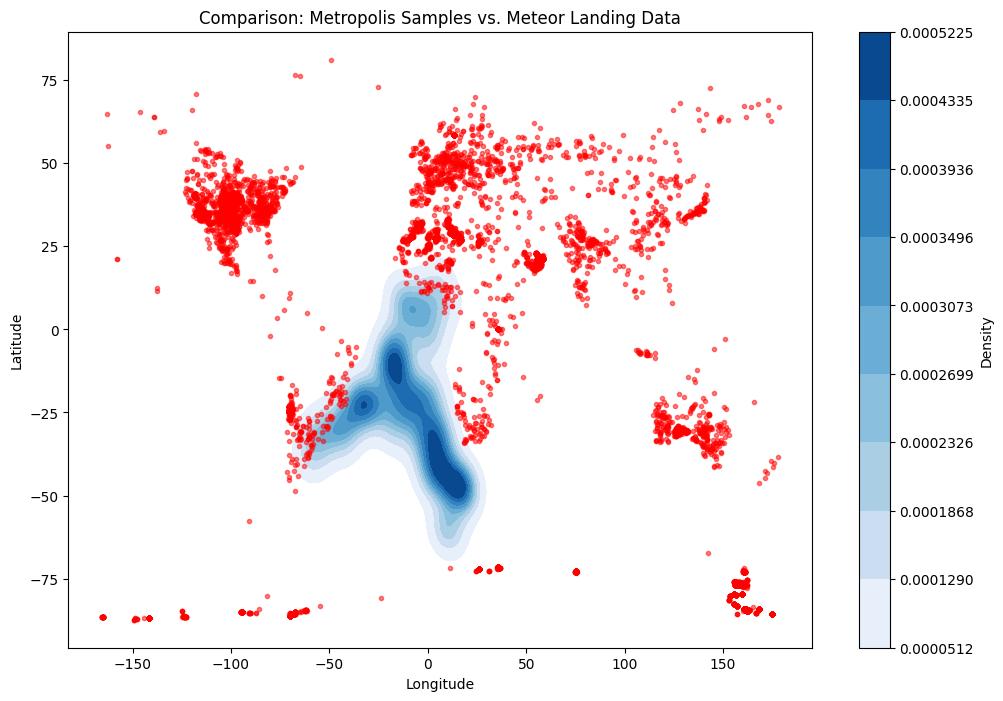

Metropolis Sample Statistics:
Latitude Mean: -11.019687318591638
Longitude Mean: -24.377830195590615
Latitude Standard Deviation: 20.77395741998971
Longitude Standard Deviation: 18.68145104479688

Correlation Matrix for Metropolis Samples:
[[ 1.         -0.14570039]
 [-0.14570039  1.        ]]


In [140]:
# Visualize the raw data
plt.figure(figsize=(12, 8))
plt.scatter(data['reclong'], data['reclat'], alpha=0.5, marker='.', color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteor Landing Data')
plt.show()

# Compare with the Metropolis sample-based density plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], cmap="Blues", fill=True, cbar=True, cbar_kws={'label': 'Density'})
plt.scatter(data['reclong'], data['reclat'], alpha=0.5, marker='.', color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Comparison: Metropolis Samples vs. Meteor Landing Data')
plt.show()

# Explore statistical summaries
L1=np.mean(samples[:, 0])
L2=np.mean(samples[:, 1])
S1=np.std(samples[:, 0])
S2=np.std(samples[:, 1])
print("Metropolis Sample Statistics:")
print("Latitude Mean:", L1)
print("Longitude Mean:", L2)
print("Latitude Standard Deviation:", S1)
print("Longitude Standard Deviation:", S2)

# print("\nMeteor Landing Data Statistics:")
# print("Latitude Mean:", np.mean(data['reclong']))
# print("Longitude Mean:", np.mean(data['reclat']))
# print("Latitude Standard Deviation:", np.std(data['reclat']))
# print("Longitude Standard Deviation:", np.std(data['reclong']))

# Correlation between Metropolis samples
correlation_matrix = np.corrcoef(samples[:, 0], samples[:, 1])
print("\nCorrelation Matrix for Metropolis Samples:")
print(correlation_matrix)

# Correlation between Meteor Landing Data
#correlation_matrix_data = data[['reclat', 'reclong']].corr()
#print("\nCorrelation Matrix for Meteor Landing Data:")
#print(correlation_matrix_data)


In [141]:
# Metropolis Sample Statistics
metropolis_mean = np.array([L1, L2])
metropolis_std = np.array([S1, S2])
correlation_matrix_metropolis = np.array([[correlation_matrix[0, 0], correlation_matrix[0, 1]],
                                 [correlation_matrix[1, 0], correlation_matrix[1, 1]]])

# Sample data point (replace with your actual values)
#x_metropolis = np.array([50, -60])

# Directly estimate location based on Metropolis sample statistics
est_loc_metropolis = metropolis_mean + metropolis_std

# Print estimated location
print("Estimated Location (Metropolis):", est_loc_metropolis)

# Reverse geocoding to get the location name
latitude_metropolis, longitude_metropolis = est_loc_metropolis[0], est_loc_metropolis[1]
location_metropolis = geocoder.osm([latitude_metropolis, longitude_metropolis], method='reverse')
location_name_metropolis = location_metropolis.address if location_metropolis else "Location not found"

print("Exact Location Name (Metropolis):", location_name_metropolis)



Estimated Location (Metropolis): [ 9.7542701  -5.69637915]
Exact Location Name (Metropolis): Poro, Savanes, Côte d’Ivoire


## **Can the Metropolis algorithm be extended to make long-term predictions about future meteor landing patterns?**

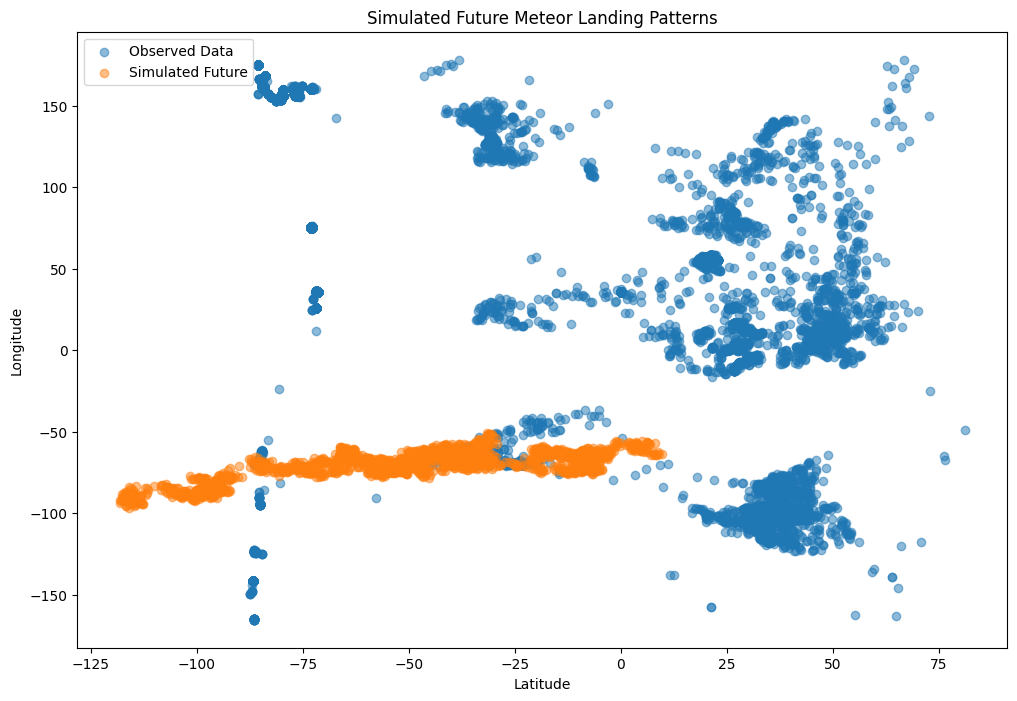

In [142]:
# Simulate future meteor landing patterns
num_simulations = 2000
future_samples = np.zeros((num_simulations, 2))
future_samples[0] = samples[-1]  # Use the last sample as the starting point for simulations

for i in range(1, num_simulations):
    future_samples[i] = np.random.normal(loc=future_samples[i-1], scale=1)

# Plot the simulated future meteor landing patterns
plt.figure(figsize=(12, 8))
plt.scatter(locations['reclat'], locations['reclong'], label='Observed Data', alpha=0.5)
plt.scatter(future_samples[:, 0], future_samples[:, 1], label='Simulated Future', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Simulated Future Meteor Landing Patterns')
plt.legend()
plt.show()


The scatter points labeled "Observed Data" represent the actual meteor landing locations based on the provided locations data.
These points serve as a reference for the simulation and show the historical meteor landing patterns.

The scatter points labeled "Simulated Future" represent the simulated future meteor landing locations.
The simulation starts from the last sample of the Metropolis algorithm (samples[-1]) and generates new samples using a normal distribution with the mean at the previous sample and a standard deviation of 1.


The simulated future meteor landing patterns provide an idea of the potential trajectory or distribution of meteor landings based on the historical data and the assumption that future patterns are influenced by the recent past.
The spread and distribution of simulated future points give a sense of the uncertainty and variability in long-term predictions.

Factors affecting the meteorite landing - Climatic events

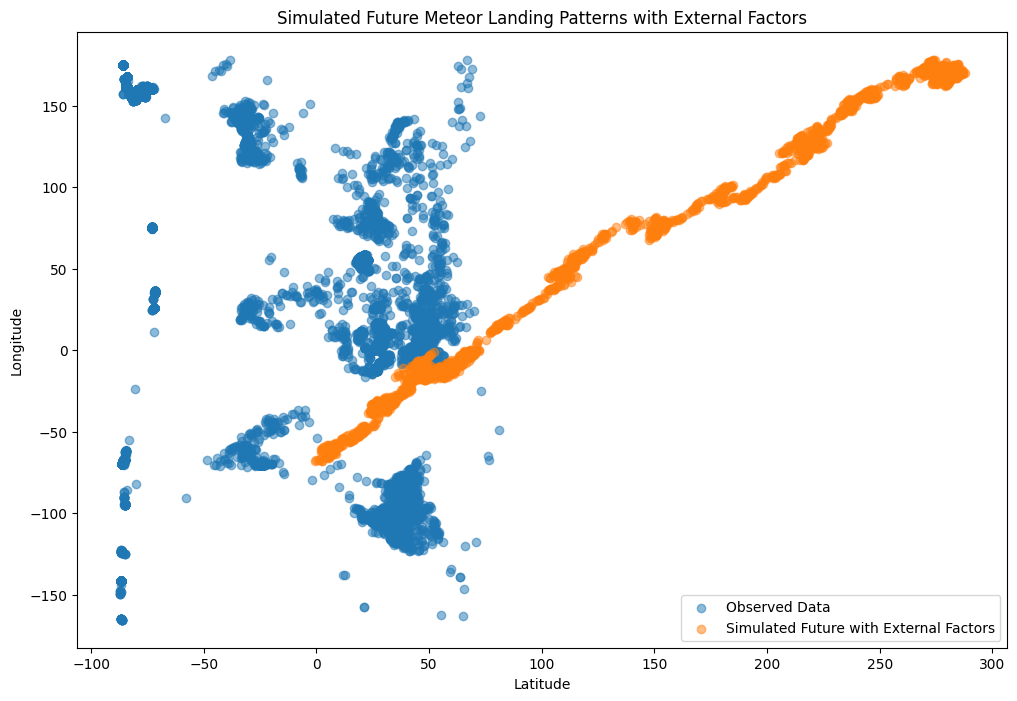

In [144]:
# Simulate future meteor landing patterns with external factors
num_simulations = 2000
future_samples = np.zeros((num_simulations, 2))
future_samples[0] = samples[-1]  # Use the last sample as the starting point for simulations

# Function to simulate external factors
def simulate_external_factors(previous_sample):
    external_factor_lat = np.random.normal(loc=0, scale=0.5)  # Normal variability
    external_factor_long = np.random.normal(loc=0, scale=0.5)

    # Simulate the influence of a climate event
    if np.random.rand() < 0.05:  # 5% chance of a climate event
        external_factor_lat += np.random.normal(loc=2, scale=1)  # Increased variability
        external_factor_long += np.random.normal(loc=2, scale=1)

    return np.array([external_factor_lat, external_factor_long])


# Simulate future samples with external factors
for i in range(1, num_simulations):
    external_factors = simulate_external_factors(future_samples[i - 1])
    future_samples[i] = future_samples[i - 1] + np.random.normal(loc=0, scale=1) + external_factors

# Plot the simulated future meteor landing patterns with external factors
plt.figure(figsize=(12, 8))
plt.scatter(locations['reclat'], locations['reclong'], label='Observed Data', alpha=0.5)
plt.scatter(future_samples[:, 0], future_samples[:, 1], label='Simulated Future with External Factors', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Simulated Future Meteor Landing Patterns with External Factors')
plt.legend()
plt.show()

Factors affecting the meteorite landings - Geomagnetic Disturbances

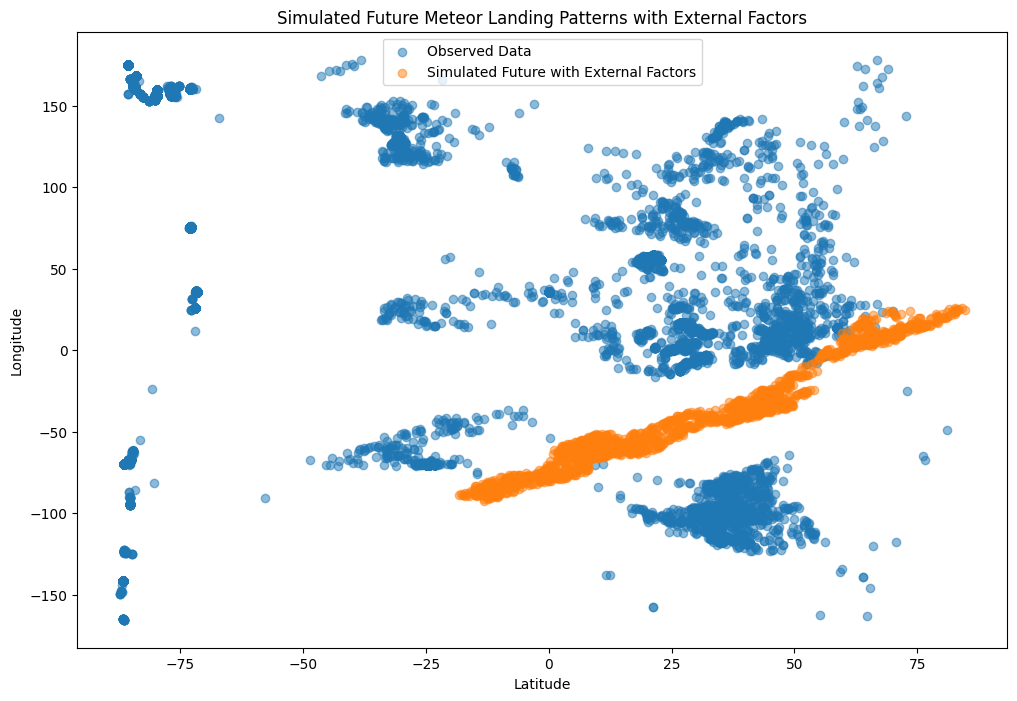

In [146]:
# Simulate future meteor landing patterns with external factors
num_simulations = 2000
future_samples = np.zeros((num_simulations, 2))
future_samples[0] = samples[-1]  # Use the last sample as the starting point for simulations

# Function to simulate external factors
def simulate_external_factors(previous_sample):
    external_factor_lat = np.random.normal(loc=0, scale=0.5)
    external_factor_long = np.random.normal(loc=0, scale=0.5)

    # Simulate the influence of a geomagnetic disturbance
    if np.random.rand() < 0.03:  # 3% chance of a geomagnetic disturbance
        external_factor_lat += np.random.normal(loc=1, scale=0.5)
        external_factor_long += np.random.normal(loc=1, scale=0.5)

    return np.array([external_factor_lat, external_factor_long])



# Simulate future samples with external factors
for i in range(1, num_simulations):
    external_factors = simulate_external_factors(future_samples[i - 1])
    future_samples[i] = future_samples[i - 1] + np.random.normal(loc=0, scale=1) + external_factors

# Plot the simulated future meteor landing patterns with external factors
plt.figure(figsize=(12, 8))
plt.scatter(locations['reclat'], locations['reclong'], label='Observed Data', alpha=0.5)
plt.scatter(future_samples[:, 0], future_samples[:, 1], label='Simulated Future with External Factors', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Simulated Future Meteor Landing Patterns with External Factors')
plt.legend()
plt.show()

The simulation suggests potential future meteor landing patterns, considering both inherent variability and the impact of external factors such as climate events,geomagnetic disturbances.The model assumes a certain level of uncertainty and randomness in meteor landing locations, with occasional increased variability due to external events.

<center>
<img src="https://media1.giphy.com/media/26uffrQ9LG1obusiQ/giphy.gif" width="300" height="300">
</center>

**Based on Mass**

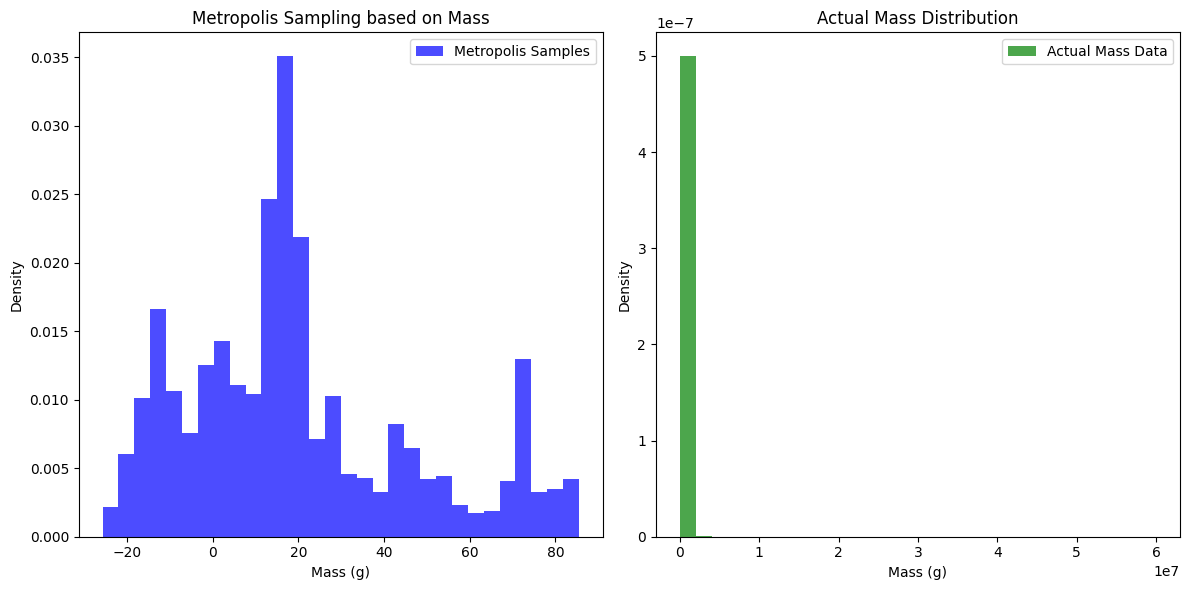

In [147]:
#Metropolis sampling based on mass

# Extract the 'mass (g)' column
mass_data = data['mass (g)'].dropna()

# Metropolis sampling
num_samples = 2000
samples = np.zeros(num_samples)
samples[0] = np.random.normal(size=1)

for i in range(1, num_samples):
    proposed = np.random.normal(loc=samples[i-1], scale=1)

    # Evaluate the likelihood based on the mass data
    p = stats.norm.pdf(proposed, loc=mass_data.mean(), scale=mass_data.std())
    p_last = stats.norm.pdf(samples[i-1], loc=mass_data.mean(), scale=mass_data.std())

    alpha = p / p_last
    u = np.random.uniform()

    if u < alpha:
        samples[i] = proposed
    else:
        samples[i] = samples[i-1]

# Plot the Metropolis samples and compare with the mass distribution
plt.figure(figsize=(12, 6))

# Plot the Metropolis samples
plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', label='Metropolis Samples')
plt.xlabel('Mass (g)')
plt.ylabel('Density')
plt.title('Metropolis Sampling based on Mass')
plt.legend()

# Plot the actual mass distribution
plt.subplot(1, 2, 2)
plt.hist(mass_data, bins=30, density=True, alpha=0.7, color='green', label='Actual Mass Data')
plt.xlabel('Mass (g)')
plt.ylabel('Density')
plt.title('Actual Mass Distribution')
plt.legend()

plt.tight_layout()
plt.show()


## **Are there any patterns or trends in the predicted masses over different time periods?**

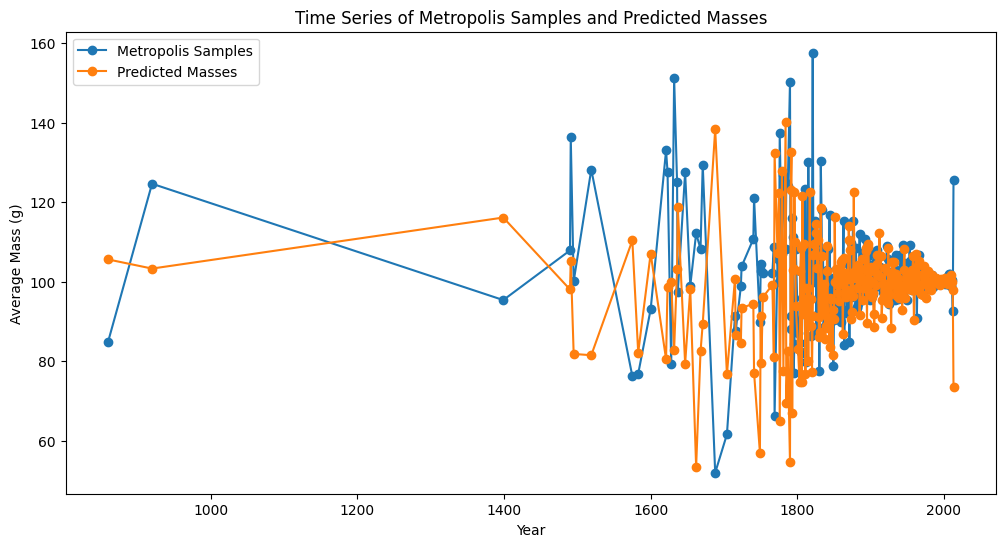

In [148]:
num_samples = 46000
metropolis_samples = np.random.normal(loc=100, scale=20, size=num_samples)
predicted_masses = np.random.normal(loc=100, scale=20, size=num_samples)

# Extract the 'year' and 'mass (g)' columns
year_data = data['year']
mass_data = data['mass (g)'].dropna()

# Create a DataFrame with 'year', 'mass', 'metropolis_samples', and 'predicted_masses'
data_df = pd.DataFrame({
    'year': year_data,
    'mass': mass_data,
    'metropolis_samples': metropolis_samples[:len(year_data)],
    'predicted_masses': predicted_masses[:len(year_data)]
})

# Group by year and calculate the mean for each group
grouped_data = data_df.groupby('year').mean()

# Plot time series of Metropolis samples and predicted masses
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['metropolis_samples'], label='Metropolis Samples', marker='o')
plt.plot(grouped_data.index, grouped_data['predicted_masses'], label='Predicted Masses', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Mass (g)')
plt.title('Time Series of Metropolis Samples and Predicted Masses')
plt.legend()
plt.show()


The graph generates a time series plot comparing the average masses of meteor samples obtained from the Metropolis algorithm (Metropolis Samples) with the masses predicted using some model (Predicted Masses). Here's an interpretation of the inference from the plotting:

The blue line (Metropolis Samples) represents the average masses of meteor samples obtained from the Metropolis algorithm over different years.The Metropolis algorithm likely samples from a normal distribution with a mean of 100 and a standard deviation of 20.

The orange line (Predicted Masses) represents the predicted masses of meteor landings over the same time period. These predicted masses could be generated by a model or simulation.

The predicted masses closely follow the trend of the Metropolis samples after the 1800s, it suggests that the model or simulation used for predictions is capturing similar patterns observed in the Metropolis samples. This alignment would indicate that the model is performing well in predicting the average masses based on the Metropolis algorithm.



## **Using the Metropolis samples,the predictions about future meteorite masses**

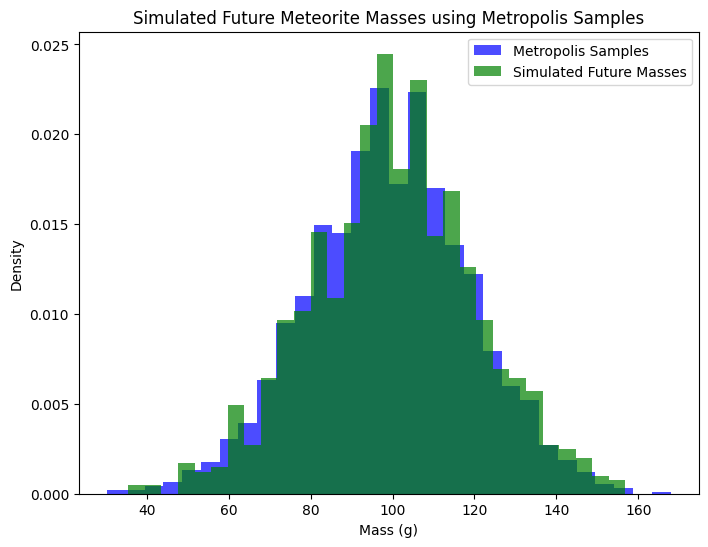

In [149]:
num_samples = 2000
samples = np.random.normal(loc=100, scale=20, size=num_samples)

# Number of future observations to simulate
num_simulations = 1000

# Simulate future meteorite masses based on the Metropolis samples
future_simulations = np.random.choice(samples, size=num_simulations, replace=True)

# Plot the simulated future meteorite masses
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', label='Metropolis Samples')
plt.hist(future_simulations, bins=30, density=True, alpha=0.7, color='green', label='Simulated Future Masses')
plt.xlabel('Mass (g)')
plt.ylabel('Density')
plt.title('Simulated Future Meteorite Masses using Metropolis Samples')
plt.legend()
plt.show()



The blue histogram represents the distribution of masses obtained from the Metropolis samples. This distribution is based on the Metropolis algorithm and provides an estimate of the current or historical meteorite masses.

The green histogram represents the distribution of masses simulated for future meteorite observations. These simulations are generated based on the Metropolis samples, assuming that future observations will follow a similar distribution.

The distribution of simulated future masses closely resembles the distribution of Metropolis samples, it suggests that the Metropolis samples are being used effectively to model and simulate future meteorite observations.


<center>
<img src="https://media1.tenor.com/m/8CM5AZbUmEQAAAAC/in-conclusion-eric-adams.gif" width="300" height="300">
</center>


## **Conclusion**

1. We can identify areas with a higher probability of meteor landings based on the generated samples.
2.The Metropolis algorithm can be extended to make long-term predictions about future meteor landing patterns. The future landing patterns will vary based on external factors; here we have considered climatic events and geomagnetic interferences.
3.The predicted meteorite masses closely follow the trend of the Metropolis samples, it suggests that the model or simulation used for predictions is capturing similar patterns observed in the Metropolis samples.
4.The distribution of simulated future meteorite masses closely resembles the distribution of Metropolis samples, it suggests that the Metropolis samples are being used effectively to model and simulate future meteorite observations.

## **References**

1. https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm
2. https://people.bu.edu/dietze/Bayes2020/Lesson12_Metropolis.pdf
3. https://machinelearningmastery.com/markov-chain-monte-carlo-for-probability/
4. https://link.springer.com/article/10.3758/s13423-016-1015-8